In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ProcessingHelpers
import PlottingHelpers
import seaborn as sns
import random
from sklearn import pipeline
import sklearn as sk
from sklearn import preprocessing
from sklearn import svm
from sklearn.externals import joblib

In [11]:
# Read rows of hard drives that failed in the end
data = pd.read_pickle("./data/rawdata/data_raw.pkl")
data = data.sort_values(['serial_number', 'date'], ascending=True)

In [12]:
data

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_174_normalized,smart_174_raw,smart_218_normalized,smart_218_raw,smart_231_normalized,smart_231_raw,smart_232_normalized,smart_232_raw,smart_233_normalized,smart_233_raw
88136,2018-01-01,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88266,2018-01-02,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88349,2018-01-03,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88298,2018-01-04,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89381,2018-01-05,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90391,2018-01-06,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90502,2018-01-07,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90072,2018-01-08,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90217,2018-01-09,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89774,2018-01-10,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Find unique serial numbers
serial_numbers = data.serial_number.unique()
serial_numbers[1:10]

array(['177QT3DUT', '17OYTGKKT', '17OYTGKMT', '17OYTGKRT', '17OYTGL0T',
       '17OYTGL4T', '17OYTGL5T', '17OYTGLDT', '17QEC1FHT'], dtype=object)

In [47]:
# Any NaN only columns?
cols_nan = data.columns[data.isna().all()].tolist()
print('Columns with all nan: \n' + str(cols_nan) + '\n')

# Any constant columns?
cols_const = [ col for col in data.columns if len(data[col].unique()) <= 1 ]
print('Columns with all const values: \n' + str(cols_const) + '\n')

Columns with all nan: 
['smart_13_normalized', 'smart_13_raw', 'smart_15_normalized', 'smart_15_raw', 'smart_201_normalized', 'smart_201_raw', 'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized', 'smart_251_raw', 'smart_252_normalized', 'smart_252_raw', 'smart_255_normalized', 'smart_255_raw', 'smart_16_normalized', 'smart_16_raw', 'smart_17_normalized', 'smart_17_raw', 'smart_168_normalized', 'smart_168_raw', 'smart_170_normalized', 'smart_170_raw', 'smart_173_normalized', 'smart_173_raw', 'smart_174_normalized', 'smart_174_raw', 'smart_218_normalized', 'smart_218_raw', 'smart_231_normalized', 'smart_231_raw', 'smart_232_normalized', 'smart_232_raw', 'smart_233_normalized', 'smart_233_raw']

Columns with all const values: 
['smart_13_normalized', 'smart_13_raw', 'smart_15_normalized', 'smart_15_raw', 'smart_201_normalized', 'smart_201_raw', 'smart_250_normalized', 'smart_250_raw', 'smart_251_normalized', 'smart_251_raw', 'smart_252_normalized', 'smart_252_raw', 'smart_255_

In [48]:
# Drop NaN and constant columns
data = data.drop(columns=cols_const + cols_nan)

In [60]:
# Now lets look at const and nan values per serial nr
data2 = data
for nr, df_temp in data.groupby('model'):
    cols_nan = data.columns[df_temp.isna().all()].tolist()
    cols_const = [ col for col in df_temp.columns if len(df_temp[col].unique()) <= 1 and col != 'model' ]
    if cols_nan or cols_const:
        print('Model: {} has columns with all nan or const: \n {}'.format(nr, cols_nan + cols_const))
print('scanned all')

Model: HGST HDS5C4040ALE630 has columns with all nan or const: 
 ['smart_11_normalized', 'smart_11_raw', 'smart_13_normalized', 'smart_13_raw', 'smart_15_normalized', 'smart_15_raw', 'smart_22_normalized', 'smart_22_raw', 'smart_177_normalized', 'smart_177_raw', 'smart_179_normalized', 'smart_179_raw', 'smart_181_normalized', 'smart_181_raw', 'smart_182_normalized', 'smart_182_raw', 'smart_183_normalized', 'smart_183_raw', 'smart_184_normalized', 'smart_184_raw', 'smart_187_normalized', 'smart_187_raw', 'smart_188_normalized', 'smart_188_raw', 'smart_189_normalized', 'smart_189_raw', 'smart_190_normalized', 'smart_190_raw', 'smart_191_normalized', 'smart_191_raw', 'smart_195_normalized', 'smart_195_raw', 'smart_200_normalized', 'smart_200_raw', 'smart_201_normalized', 'smart_201_raw', 'smart_220_normalized', 'smart_220_raw', 'smart_222_normalized', 'smart_222_raw', 'smart_223_normalized', 'smart_223_raw', 'smart_224_normalized', 'smart_224_raw', 'smart_225_normalized', 'smart_225_raw',

KeyError: "['smart_11_normalized' 'smart_11_raw' 'smart_13_normalized' 'smart_13_raw'\n 'smart_15_normalized' 'smart_15_raw' 'smart_22_normalized' 'smart_22_raw'\n 'smart_177_normalized' 'smart_177_raw' 'smart_179_normalized'\n 'smart_179_raw' 'smart_181_normalized' 'smart_181_raw'\n 'smart_182_normalized' 'smart_182_raw' 'smart_183_normalized'\n 'smart_183_raw' 'smart_184_normalized' 'smart_184_raw'\n 'smart_187_normalized' 'smart_187_raw' 'smart_188_normalized'\n 'smart_188_raw' 'smart_189_normalized' 'smart_189_raw'\n 'smart_190_normalized' 'smart_190_raw' 'smart_191_normalized'\n 'smart_191_raw' 'smart_195_normalized' 'smart_195_raw'\n 'smart_200_normalized' 'smart_200_raw' 'smart_201_normalized'\n 'smart_201_raw' 'smart_220_normalized' 'smart_220_raw'\n 'smart_222_normalized' 'smart_222_raw' 'smart_223_normalized'\n 'smart_223_raw' 'smart_224_normalized' 'smart_224_raw'\n 'smart_225_normalized' 'smart_225_raw' 'smart_226_normalized'\n 'smart_226_raw' 'smart_235_normalized' 'smart_235_raw'\n 'smart_240_normalized' 'smart_240_raw' 'smart_241_normalized'\n 'smart_241_raw' 'smart_242_normalized' 'smart_242_raw'\n 'smart_250_normalized' 'smart_250_raw' 'smart_251_normalized'\n 'smart_251_raw' 'smart_252_normalized' 'smart_252_raw'\n 'smart_254_normalized' 'smart_254_raw' 'smart_255_normalized'\n 'smart_255_raw' 'smart_23_normalized' 'smart_23_raw'\n 'smart_24_normalized' 'smart_24_raw' 'smart_16_normalized' 'smart_16_raw'\n 'smart_17_normalized' 'smart_17_raw' 'smart_168_normalized'\n 'smart_168_raw' 'smart_170_normalized' 'smart_170_raw'\n 'smart_173_normalized' 'smart_173_raw' 'smart_174_normalized'\n 'smart_174_raw' 'smart_218_normalized' 'smart_218_raw'\n 'smart_231_normalized' 'smart_231_raw' 'smart_232_normalized'\n 'smart_232_raw' 'smart_233_normalized' 'smart_233_raw'\n 'smart_11_normalized' 'smart_11_raw' 'smart_13_normalized' 'smart_13_raw'\n 'smart_15_normalized' 'smart_15_raw' 'smart_22_normalized' 'smart_22_raw'\n 'smart_177_normalized' 'smart_177_raw' 'smart_179_normalized'\n 'smart_179_raw' 'smart_181_normalized' 'smart_181_raw'\n 'smart_182_normalized' 'smart_182_raw' 'smart_183_normalized'\n 'smart_183_raw' 'smart_184_normalized' 'smart_184_raw'\n 'smart_187_normalized' 'smart_187_raw' 'smart_188_normalized'\n 'smart_188_raw' 'smart_189_normalized' 'smart_189_raw'\n 'smart_190_normalized' 'smart_190_raw' 'smart_191_normalized'\n 'smart_191_raw' 'smart_195_normalized' 'smart_195_raw'\n 'smart_200_normalized' 'smart_200_raw' 'smart_201_normalized'\n 'smart_201_raw' 'smart_220_normalized' 'smart_220_raw'\n 'smart_222_normalized' 'smart_222_raw' 'smart_223_normalized'\n 'smart_223_raw' 'smart_224_normalized' 'smart_224_raw'\n 'smart_225_normalized' 'smart_225_raw' 'smart_226_normalized'\n 'smart_226_raw' 'smart_235_normalized' 'smart_235_raw'\n 'smart_240_normalized' 'smart_240_raw' 'smart_241_normalized'\n 'smart_241_raw' 'smart_242_normalized' 'smart_242_raw'\n 'smart_250_normalized' 'smart_250_raw' 'smart_251_normalized'\n 'smart_251_raw' 'smart_252_normalized' 'smart_252_raw'\n 'smart_254_normalized' 'smart_254_raw' 'smart_255_normalized'\n 'smart_255_raw' 'smart_23_normalized' 'smart_23_raw'\n 'smart_24_normalized' 'smart_24_raw' 'smart_16_normalized' 'smart_16_raw'\n 'smart_17_normalized' 'smart_17_raw' 'smart_168_normalized'\n 'smart_168_raw' 'smart_170_normalized' 'smart_170_raw'\n 'smart_173_normalized' 'smart_173_raw' 'smart_174_normalized'\n 'smart_174_raw' 'smart_218_normalized' 'smart_218_raw'\n 'smart_231_normalized' 'smart_231_raw' 'smart_232_normalized'\n 'smart_232_raw' 'smart_233_normalized' 'smart_233_raw'] not found in axis"

In [13]:
# only 12 columns are not pure NaN or constant per model
# https://www.backblaze.com/blog/hard-drive-smart-stats/
data_pruned = data[['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
                   'smart_5_raw', 'smart_9_raw', 'smart_187_raw',
                   'smart_188_raw', 'smart_197_raw', 'smart_198_raw']]


In [14]:
data_pruned = data_pruned.rename(index=str, columns={"smart_5_raw": "Reallocated_Sector_Count", "smart_9_raw": "Days_In_Service",
                                      "smart_187_raw": "Reported_Uncorrectable_Errors", "smart_188_raw": "Command_Timeout",
                                      "smart_197_raw": "Current_Pending_Sector_Count", "smart_198_raw": "Offline_Uncorrectable"})
data_pruned = data_pruned.sort_values(['serial_number', 'date'], ascending=[True,False])
data_pruned

,date,serial_number,model,capacity_bytes,failure,Reallocated_Sector_Count,Days_In_Service,Reported_Uncorrectable_Errors,Command_Timeout,Current_Pending_Sector_Count,Offline_Uncorrectable
95747,2018-11-24,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,1,0.0,14859.0,NaN,NaN,48.0,0.0
95749,2018-11-23,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,14834.0,NaN,NaN,48.0,0.0
95808,2018-11-22,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,14810.0,NaN,NaN,16.0,0.0
95809,2018-11-21,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,14788.0,NaN,NaN,16.0,0.0
95809,2018-11-20,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,14764.0,NaN,NaN,16.0,0.0
95802,2018-11-19,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,14739.0,NaN,NaN,16.0,0.0
95807,2018-11-18,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,14715.0,NaN,NaN,16.0,0.0
95808,2018-11-17,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,14692.0,NaN,NaN,16.0,0.0
95810,2018-11-16,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,14668.0,NaN,NaN,16.0,0.0
95810,2018-11-15,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,14644.0,NaN,NaN,16.0,0.0


In [16]:
# Make a Column for the RUL target data
# get the time of the last available measurement for each unit
#erial_numbers = data_pruned.serial_number.unique()
#ata_pruned = data_pruned.loc[data_pruned['serial_number'].isin(serial_numbers)]
#ata_pruned = data_pruned.copy()
# calculate RUL = time.max() - time_now for each unit
#data = pd.read_pickle("./data/rawdata/data_raw_pruned.pkl")
#data_pruned = data.copy()
data_pruned['RUL'] = data_pruned.groupby((data_pruned['serial_number'] != 
                                        data_pruned['serial_number'].shift(1)).cumsum()).cumcount()

data_pruned = data_pruned.sort_values(['serial_number', 'date'], ascending=True)
data_pruned.to_pickle("C:/Users/kwesendrup/PycharmProjects/master/backblaze/data/rawdata/data_raw_pruned.pkl")
data_pruned

,date,serial_number,model,capacity_bytes,failure,Reallocated_Sector_Count,Days_In_Service,Reported_Uncorrectable_Errors,Command_Timeout,Current_Pending_Sector_Count,Offline_Uncorrectable,RUL
88136,2018-01-01,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7013.0,NaN,NaN,0.0,0.0,0
88266,2018-01-02,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7038.0,NaN,NaN,0.0,0.0,1
88349,2018-01-03,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7062.0,NaN,NaN,0.0,0.0,2
88298,2018-01-04,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7077.0,NaN,NaN,0.0,0.0,3
89381,2018-01-05,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7102.0,NaN,NaN,0.0,0.0,4
90391,2018-01-06,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7126.0,NaN,NaN,0.0,0.0,5
90502,2018-01-07,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7149.0,NaN,NaN,0.0,0.0,6
90072,2018-01-08,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7174.0,NaN,NaN,0.0,0.0,7
90217,2018-01-09,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7197.0,NaN,NaN,0.0,0.0,8
89774,2018-01-10,175PP3I7T,TOSHIBA MQ01ABF050M,500107862016,0,0.0,7221.0,NaN,NaN,0.0,0.0,9


In [38]:
# Continue with sorted, pruned data with RUL count
data_pruned = pd.read_pickle("./data/rawdata/data_raw_pruned.pkl")
data_pruned[['Days_In_Service']] = data_pruned[['Days_In_Service']].div(24).round(0)

In [53]:
data_pruned.shape

(399303, 12)

In [54]:
data_pruned[((data_pruned.Days_In_Service==0) &
            (data_pruned.RUL==0))].shape


(34, 12)

In [1]:
#data_pruned = data_pruned[-((data_pruned.Days_In_Service==0) &
            #(data_pruned.RUL==0))]
#data_pruned
data['serial_number'].unique().tolist()

NameError: name 'data' is not defined

In [5]:
data_raw = pd.read_pickle("./data/rawdata/data_raw_160101-171231.pkl")
data_raw = data_raw.append(pd.read_pickle("./data/rawdata/data_raw_180101-190331.pkl"))
data_raw.shape

(2426008, 129)

In [23]:
data_raw = pd.read_pickle("./data/rawdata/data_raw_160101-171231.pkl")
data_raw = data_raw.append(pd.read_pickle("./data/rawdata/data_raw_180101-190331.pkl"))
data_pruned = data_raw[['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
                   'smart_5_raw', 'smart_9_raw', 'smart_187_raw',
                   'smart_188_raw', 'smart_197_raw', 'smart_198_raw']]
data_pruned = data_pruned.rename(index=str, columns={"smart_5_raw": "Reallocated_Sector_Count", "smart_9_raw": "Days_In_Service",
                                      "smart_187_raw": "Reported_Uncorrectable_Errors", "smart_188_raw": "Command_Timeout",
                                      "smart_197_raw": "Current_Pending_Sector_Count", "smart_198_raw": "Offline_Uncorrectable"})
data_pruned = data_pruned.sort_values(['serial_number', 'date'], ascending=[True,False])
data_pruned['RUL'] = data_pruned.groupby((data_pruned['serial_number'] != 
                                        data_pruned['serial_number'].shift(1)).cumsum()).cumcount()

data_pruned = data_pruned.sort_values(['serial_number', 'date'], ascending=True)
data_pruned[['Days_In_Service']] = data_pruned[['Days_In_Service']].div(24).round(0)
data_pruned.to_pickle("C:/Users/kwesendrup/PycharmProjects/master/backblaze/data/rawdata/data_raw_pruned.pkl")
#data2 = data_raw[data_raw['smart_9_raw']<24].copy()
#len(data2['serial_number'].unique().tolist())

In [24]:
data_raw = pd.read_pickle("./data/rawdata/data_raw_180101-190331.pkl")
#data_raw = data_raw.append(pd.read_pickle("./data/rawdata/data_raw_180101-190331.pkl"))
data_raw['serial_number'].unique().tolist()

['S301GMGW',
 'Z300X8BY',
 'ZCH05KWT',
 'S301NGZN',
 'Z304KR3C',
 'Z305C1W5',
 'ZA16DSXV',
 'PL1331LAHBSELH',
 'Z300WKNW',
 'ZCH080T0',
 'Z305KQZK',
 'Z3025LH2',
 'ZA1890DY',
 'PL2331LAHDSHTJ',
 'WD-WX71A14S0199',
 'ZA171RYT',
 'Z4D0B8KL',
 'Z304L9KQ',
 'W300GLSS',
 'PL2331LAH9R55J',
 'ZCH07J8T',
 'ZA11LZSP',
 'WD-WX71A14M9841',
 'ZA142S4H',
 'ZA10NJBT',
 'ZA140NJM',
 'ZCH066ET',
 'Z3011WM3',
 'ZCH07CLT',
 'Z304KBTJ',
 'S301GQBS',
 'Z3040LRE',
 'ZCH07Q3L',
 'Z302SLZT',
 'Z300KYGS',
 'Z3041NJE',
 'S2ZYJ9KG928204',
 'W300THEG',
 'Z300JE19',
 'Z300ZTWC',
 'Z3015J1R',
 'Z3029GF5',
 'S2ZYJ9GGB01043',
 'Z302SZJ5',
 'W300B0JC',
 'S300Z0LB',
 'ZA181026',
 'ZCH07HG8',
 'Z300GYMT',
 'S300Z3XP',
 'VKGKSYSX',
 'PL2331LAGRWU3J',
 'Z4E09F4D',
 'ZA12GTRM',
 'Z3025L3F',
 'S300XB04',
 'ZA13WHJY',
 'Z305758R',
 'Z3025LXD',
 'Z300K1Z7',
 '96ICTBQ4T',
 'Z304JNRJ',
 'ZA180RA6',
 'ZA13WCBB',
 'Z303R6EC',
 'PL1331LAHBGLPH',
 'Z3025LEN',
 'Z305ACLS',
 'Z302CYHA',
 'WD-WX11D9435HEK',
 'S2ZYJ9GGB02016',
 'S300V

In [26]:
data_pruned

,date,serial_number,model,capacity_bytes,failure,Reallocated_Sector_Count,Days_In_Service,Reported_Uncorrectable_Errors,Command_Timeout,Current_Pending_Sector_Count,Offline_Uncorrectable,RUL
46330,2016-01-01,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,702.0,NaN,NaN,0.0,0.0,110
46329,2016-01-02,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,703.0,NaN,NaN,0.0,0.0,109
46383,2016-01-03,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,704.0,NaN,NaN,0.0,0.0,108
46384,2016-01-04,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,705.0,NaN,NaN,0.0,0.0,107
46344,2016-01-05,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,706.0,NaN,NaN,0.0,0.0,106
46306,2016-01-06,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,707.0,NaN,NaN,0.0,0.0,105
46306,2016-01-07,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,708.0,NaN,NaN,0.0,0.0,104
46307,2016-01-08,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,709.0,NaN,NaN,0.0,0.0,103
46307,2016-01-09,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,710.0,NaN,NaN,0.0,0.0,102
46307,2016-01-10,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,711.0,NaN,NaN,0.0,0.0,101


In [29]:
data2 = data_pruned[data_pruned['Days_In_Service']<=1].copy()
models = data2['serial_number'].unique().tolist()
serials = data2['serial_number'].unique().tolist()
len(serials)

216

In [32]:
data_pruned = data_pruned[data_pruned['serial_number'].isin(serials)].copy()
data_pruned.shape
data_pruned.to_pickle("C:/Users/kwesendrup/PycharmProjects/master/backblaze/data/rawdata/data_raw_pruned.pkl")

In [1]:
data_pruned['Days_In_Service'].mean()

NameError: name 'data_pruned' is not defined

In [1]:
data_raw_3 = pd.read_pickle("./data/rawdata/data_raw_pruned_160101-190331.pkl")

NameError: name 'pd' is not defined

In [45]:
data_raw_3

,date,serial_number,model,capacity_bytes,failure,Reallocated_Sector_Count,Days_In_Service,Reported_Uncorrectable_Errors,Command_Timeout,Current_Pending_Sector_Count,Offline_Uncorrectable,RUL
46330,2016-01-01,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,702.0,NaN,NaN,0.0,0.0,110
46329,2016-01-02,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,703.0,NaN,NaN,0.0,0.0,109
46383,2016-01-03,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,704.0,NaN,NaN,0.0,0.0,108
46384,2016-01-04,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,705.0,NaN,NaN,0.0,0.0,107
46344,2016-01-05,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,706.0,NaN,NaN,0.0,0.0,106
46306,2016-01-06,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,707.0,NaN,NaN,0.0,0.0,105
46306,2016-01-07,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,708.0,NaN,NaN,0.0,0.0,104
46307,2016-01-08,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,709.0,NaN,NaN,0.0,0.0,103
46307,2016-01-09,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,710.0,NaN,NaN,0.0,0.0,102
46307,2016-01-10,13H883WAS,TOSHIBA DT01ACA300,3000592982016,0,0.0,711.0,NaN,NaN,0.0,0.0,101


In [43]:
# Number of serials per model
data_raw_3_grouped = data_raw_3.groupby('model')['serial_number'].nunique().sort_values(ascending = False).copy()
data_raw_3_grouped

model
ST4000DM000                2686
ST12000NM0007               494
ST8000NM0055                271
ST8000DM002                 261
HGST HMS5C4040BLE640        188
HGST HMS5C4040ALE640         79
ST500LM012 HN                77
TOSHIBA MQ01ABF050           74
ST4000DX000                  71
ST320LT007                   63
Hitachi HDS5C3030ALA630      50
Hitachi HDS722020ALA330      48
WDC WD30EFRX                 47
ST6000DX000                  47
WDC WD60EFRX                 44
ST4000DM001                  34
WDC WD5000LPVX               27
Hitachi HDS723030ALA640      26
Hitachi HDS5C4040ALE630      21
ST500LM030                   16
WDC WD800AAJS                14
TOSHIBA MG07ACA14TA          10
Samsung SSD 850 EVO 1TB      10
ST10000NM0086                10
TOSHIBA MQ01ABF050M          10
HGST HUH728080ALE600         10
WDC WD1600AAJS                8
WDC WD10EADS                  7
ST3160318AS                   7
WDC WD20EFRX                  6
                           ... 
WD

In [44]:
# Only retrieve models w/ sample size 
data_raw_3_grouped.sum()*0.03

143.97

In [40]:
# plot an overview of whats going on in the columns
data_raw_3.describe()#.T.plot.bar(subplots=True, figsize=(15,50))

,Reallocated_Sector_Count,Days_In_Service,Reported_Uncorrectable_Errors,Command_Timeout,Current_Pending_Sector_Count,Offline_Uncorrectable,RUL
count,2.425910e+06,2.425910e+06,2.074750e+06,2.074282e+06,2.425442e+06,2.425442e+06,2.426008e+06
mean,8.426467e+01,6.208045e+02,1.016774e+00,1.327118e+08,2.703152e+00,2.614787e+00,4.047706e+02
std,1.385290e+03,4.168330e+02,1.292488e+02,2.706123e+10,1.827769e+02,1.820000e+02,3.287794e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.640000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.420000e+02
50%,0.000000e+00,5.580000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.240000e+02
75%,0.000000e+00,9.360000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.870000e+02
max,6.528800e+04,3.770000e+03,6.553500e+04,8.933668e+12,1.426160e+05,1.426160e+05,1.631000e+03


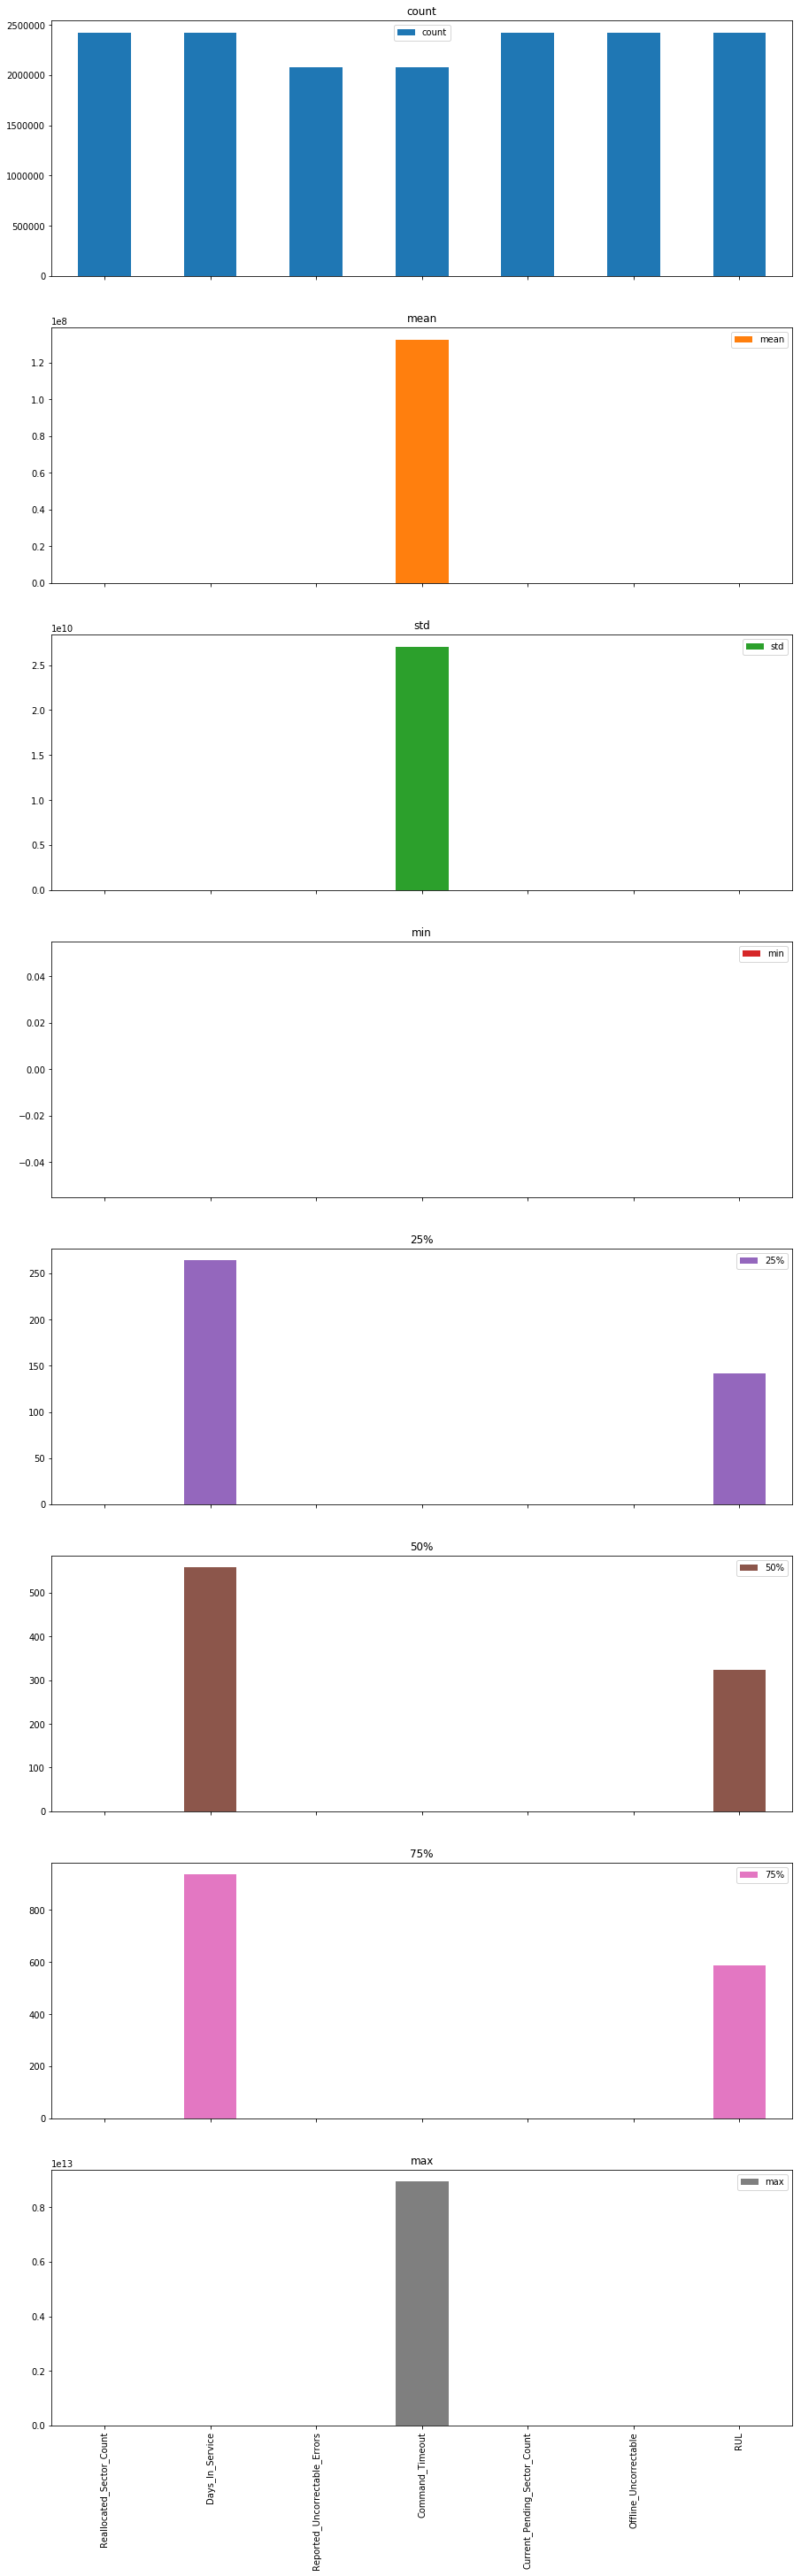

In [42]:
# Plot values
axes = data_raw_3.describe().T.plot.bar(subplots=True, figsize=(15,50))

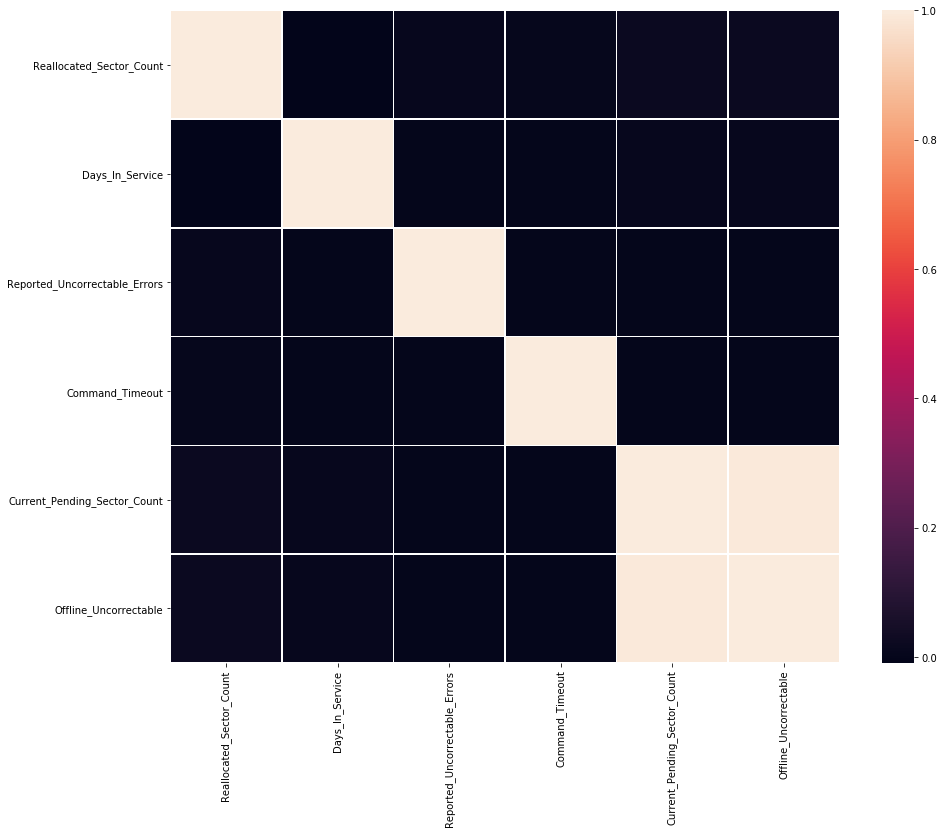

In [62]:
# Plot correlation
df_sub = data_raw_3.copy()
del df_sub['serial_number']
del df_sub['model']
del df_sub['capacity_bytes']
del df_sub['failure']
del df_sub['RUL']

df_sub.set_index('date', inplace=True)
df_sub.dropna(axis=1, how='all', inplace=True)

df_corr = df_sub.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df_corr, linewidths=.5)

In [26]:
def exclude_trivial(df_sub):
    cols = []
    for col in df_sub.columns:
        if col == 'serial_number':
            continue
        elif col == 'RUL':
            continue
        elif len(df_sub[col].unique()) <= 2:
            continue
        else:
            cols.append(col)
            
    return df_sub[cols].copy()

def get_data_non_trivial(df, unit_nr, ):
    df_sub = df.loc[df['serial_number'] == unit_nr].copy()
    df_sub.set_index('date', inplace=True)
    df_sub.dropna(axis=1, how='all', inplace=True)
    
    df_sub = exclude_trivial(df_sub)
    return df_sub


def get_data_by_cols_and_unit(df, unit_nr, cols):
    df_sub = df.loc[df['serial_number'] == unit_nr].copy()
    df_sub.set_index('date', inplace=True)
    df_sub.dropna(axis=1, how='all', inplace=True)
    
    df_sub = df_sub[cols]
    return df_sub


def plot_ts_by_unit(df, unit_nr, wind_size):
    '''plot all non trivial measurements and states'''
    df_sub = get_data_non_trivial(df, unit_nr)
    cols = df_sub.columns
    fig, axes = plt.subplots(len(cols), 1, figsize=(15,12))
    
    for col, ax in zip(cols, axes):
        df_sub[col].plot(ax = ax)
        df_sub[col].rolling(wind_size).median().plot(style = '-', ax = ax)
        df_sub[col].rolling(wind_size).mean().plot(style = '--', legend=True, ax = ax)
    fig.suptitle('serial_number: {}'.format(unit_nr))

def plot_hist_by_unit(df, unit_nr, wind_size):
    '''plot all non trivial measurements and states'''
    df_sub = get_data_non_trivial(df, unit_nr)
    cols = df_sub.columns
    n_cols = min(len(cols), 5)
    n_rows = int(np.ceil(len(cols) / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,12))
    axes = axes.flatten()
    for col, ax in zip(cols, axes):
        sns.distplot(df_sub[[col]], ax=ax, label=col)
        labels(col, "p", ax)
    fig.suptitle('serial_number: {}'.format(unit_nr))

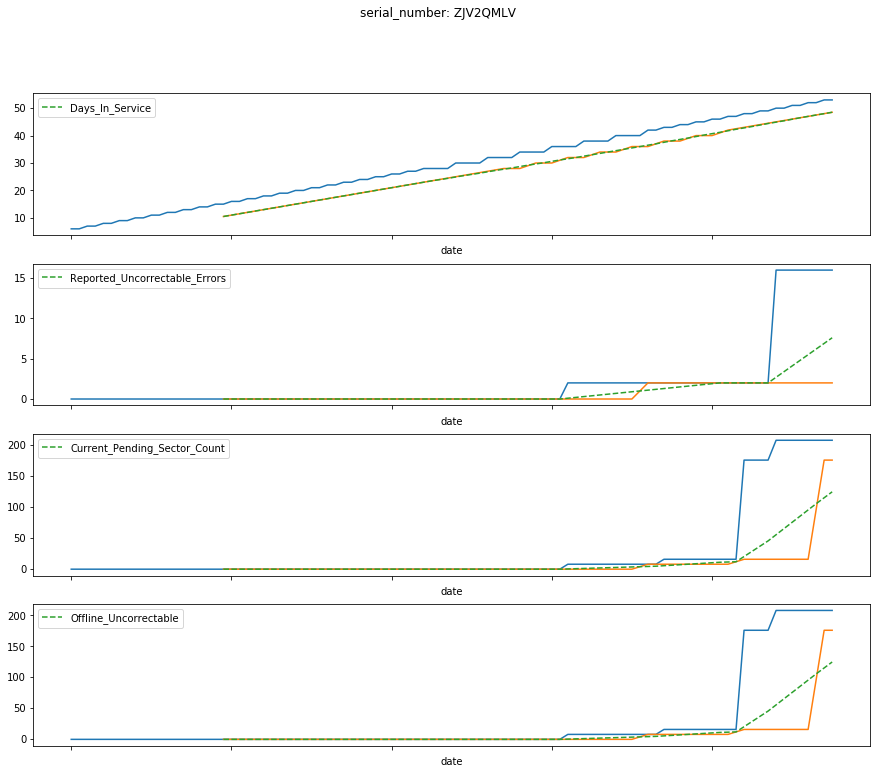

In [79]:
wind_size = 20
# plot operating machine data
plot_ts_by_unit(data_raw_3, 'ZJV2QMLV', wind_size)

In [8]:
cols_data = [col for col in df.columns if not (col == 'serial_number' or
                                        col == 'model' or
                                        col == 'capacity_bytes' or
                                        col == 'failure' or
                                        col == 'RUL' or
                                        col == 'date')]

NameError: name 'df' is not defined

In [26]:
# Min Max Normalization    TODO Change to Mean Var Normalization                                    
df_min = df_norm.min()
df_max = df_norm.max()
for feature_name in cols_data:
    max_value = df_norm[feature_name].max()
    min_value = df_norm[feature_name].min()
    df_norm[feature_name] = (df_norm[feature_name] - min_value) / (max_value - min_value)

In [3]:
df_norm

NameError: name 'df_norm' is not defined

In [36]:
df = pd.read_pickle("./data/rawdata/data_preprocessed.pkl")
df = df.loc[df['model'] == 'ST4000DM000'].copy()
df.sort_values(by='RUL')

,date,serial_number,model,capacity_bytes,failure,Reallocated_Sector_Count,Days_In_Service,Reported_Uncorrectable_Errors,Command_Timeout,Current_Pending_Sector_Count,Offline_Uncorrectable,RUL
28647,2018-04-20,Z307P18F,ST4000DM000,4000787030016,1,0.0,87.0,0.0,0.0,0.0,0.0,0
61167,2016-09-29,Z300MX97,ST4000DM000,4000787030016,1,0.0,1092.0,0.0,0.0,0.0,0.0,0
16851,2016-11-11,Z30250SA,ST4000DM000,4000787030016,1,0.0,736.0,0.0,0.0,24.0,24.0,0
53549,2018-06-29,Z304KCVH,ST4000DM000,4000787030016,1,32.0,954.0,27.0,0.0,88.0,88.0,0
5619,2017-05-10,Z304KCVV,ST4000DM000,4000787030016,1,0.0,524.0,1.0,0.0,0.0,0.0,0
47860,2016-12-08,Z300MXWT,ST4000DM000,4000787030016,1,0.0,1162.0,0.0,0.0,32.0,32.0,0
17184,2018-05-19,S301G7S7,ST4000DM000,4000787030016,1,0.0,1009.0,30.0,0.0,216.0,216.0,0
22289,2016-02-27,Z300N1DZ,ST4000DM000,4000787030016,1,0.0,929.0,0.0,0.0,24.0,24.0,0
71537,2017-06-13,Z30250P5,ST4000DM000,4000787030016,1,0.0,973.0,0.0,0.0,104.0,104.0,0
30440,2016-08-29,Z304KCW8,ST4000DM000,4000787030016,1,0.0,283.0,3.0,0.0,16.0,16.0,0


In [41]:
# How many serials in total?
df.groupby('serial_number')['serial_number'].nunique().sort_values(ascending = False).copy().count()

2685

In [94]:
# Reduce hard drives that have no measurements in last 10 days
df_le = df.loc[df['RUL'] <= 10].copy()
df_w_values = df.loc[(df['Reallocated_Sector_Count'] != 0) |
                     (df['Reported_Uncorrectable_Errors'] != 0) |
                     (df['Command_Timeout'] != 0) |
                     (df['Current_Pending_Sector_Count'] != 0) |
                     (df['Offline_Uncorrectable'] != 0) ].copy()
df_w_values.groupby('serial_number')['serial_number'].nunique().sort_values(ascending = False).copy().count()

1858

In [62]:
df_w_values.describe()

,Reallocated_Sector_Count,Days_In_Service,Reported_Uncorrectable_Errors,Command_Timeout,Current_Pending_Sector_Count,Offline_Uncorrectable,RUL
count,229175.000000,229175.000000,229175.000000,2.291750e+05,229175.000000,229175.000000,229190.000000
mean,162.816581,800.618540,4.884839,7.758140e+08,13.260146,13.260146,223.580326
std,1513.070716,352.700928,335.451308,8.134184e+10,260.343171,260.343171,216.858945
min,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,523.000000,0.000000,0.000000e+00,0.000000,0.000000,57.000000
50%,0.000000,805.000000,0.000000,0.000000e+00,0.000000,0.000000,155.000000
75%,0.000000,1052.000000,3.000000,1.000000e+00,8.000000,8.000000,323.000000
max,55360.000000,1782.000000,65535.000000,8.933668e+12,41944.000000,41944.000000,1152.000000


In [95]:
for feature_name in cols_data:
    max_value = df_w_values[feature_name].max()
    min_value = df_w_values[feature_name].min()
    df_w_values[feature_name] = (df_w_values[feature_name] - min_value) / (max_value - min_value)
df_w_values.describe()

,Reallocated_Sector_Count,Days_In_Service,Reported_Uncorrectable_Errors,Command_Timeout,Current_Pending_Sector_Count,Offline_Uncorrectable,RUL
count,229175.000000,229175.000000,229175.000000,2.291750e+05,229175.000000,229175.000000,229190.000000
mean,0.002941,0.448972,0.000075,8.684160e-05,0.000316,0.000316,223.580326
std,0.027331,0.198035,0.005119,9.105088e-03,0.006207,0.006207,216.858945
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.293094,0.000000,0.000000e+00,0.000000,0.000000,57.000000
50%,0.000000,0.451432,0.000000,0.000000e+00,0.000000,0.000000,155.000000
75%,0.000000,0.590118,0.000046,1.119361e-13,0.000191,0.000191,323.000000
max,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1152.000000


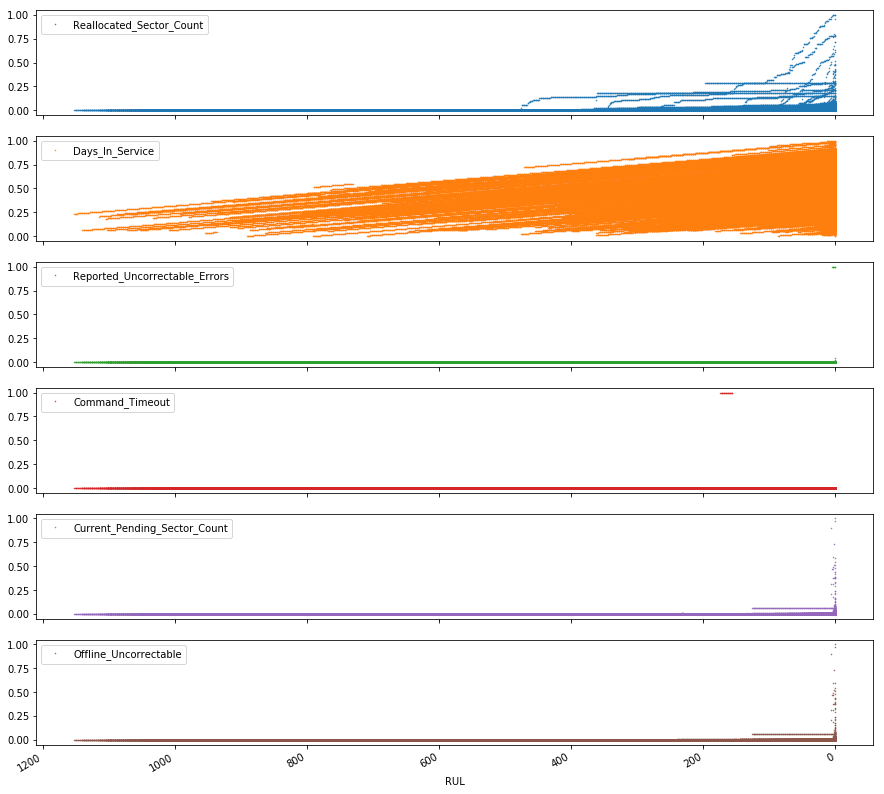

In [69]:
df_w_values.plot(x='RUL', y=cols_data, subplots=True, figsize=(15, 15), linestyle="", marker=".", markersize = 1)
plt.gca().invert_xaxis()
plt.show()

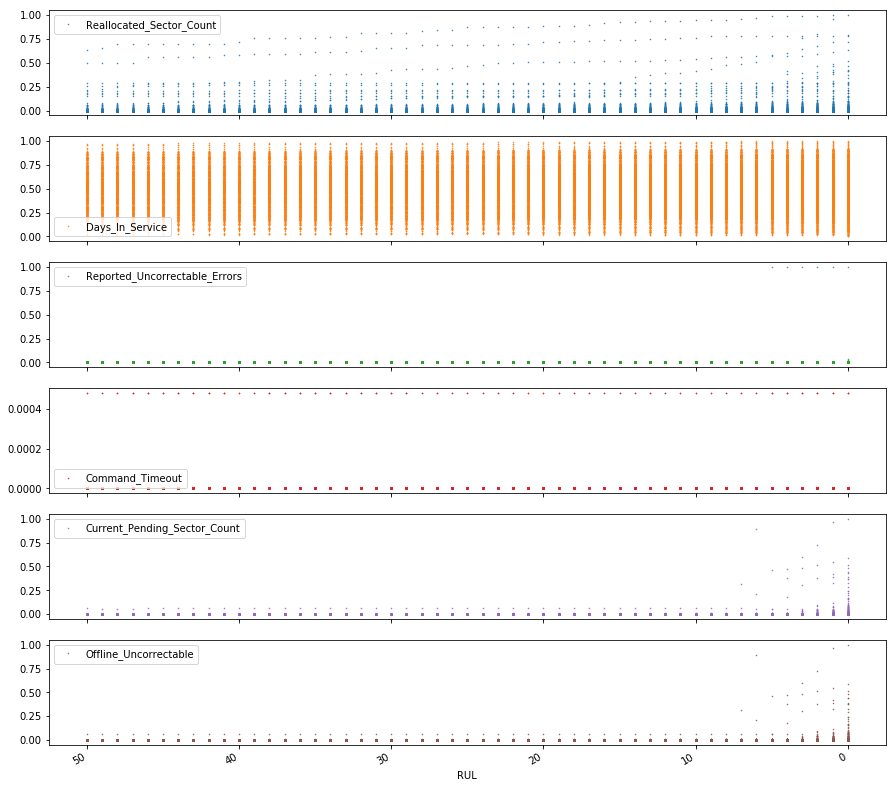

In [72]:
# Zoom in
df_close_to_end = df_w_values.loc[df_w_values['RUL'] <= 50].copy()
df_close_to_end.plot(x='RUL', y=cols_data, subplots=True, figsize=(15, 15), linestyle="", marker=".", markersize = 1)
plt.gca().invert_xaxis()
plt.show()

In [126]:
# take out a certain percentage of units from the training data set for testing later
df_w_values = df_w_values.dropna()

units = df_w_values['serial_number'].unique()
n_units = len(df_w_values['serial_number'].unique())

units_test = random.sample(list(units), int(n_units * 0.2))
units_train = [nr for nr in units if nr not in units_test]


df_n_test = df_w_values.loc[df_w_values['serial_number'].apply( lambda x: x in units_test )].copy()
df_n_train = df_w_values.loc[df_w_values['serial_number'].apply( lambda x: x in units_train )].copy()

print("Number of hard drives in test: " + str(len(units_test)) +
      "\n" + "Number of hard drives in train: " + str(len(units_train)))

Number of hard drives in test: 370
Number of hard drives in train: 1481


In [127]:
#df_n_test.isnull().sum(axis = 0)
df_n_train.isnull().sum(axis = 0)

date                             0
serial_number                    0
model                            0
capacity_bytes                   0
failure                          0
Reallocated_Sector_Count         0
Days_In_Service                  0
Reported_Uncorrectable_Errors    0
Command_Timeout                  0
Current_Pending_Sector_Count     0
Offline_Uncorrectable            0
RUL                              0
dtype: int64

In [2]:
# Do a simple support vector machine based regression based on all training data
# define a helper function for the simple fitting through a support vector machine
def fit_sub(df_n_train, df_n_test, mdl, cols_features):
    X_train = df_n_train[cols_data].values
    y_train = df_n_train['RUL'].values

    X_test = df_n_test[cols_data].values
    y_test = df_n_test['RUL'].values

    print(X_train.shape)
    if mdl is None:
        mdl = sk.pipeline.Pipeline([
            ('scaler', sk.preprocessing.MinMaxScaler()),
            ('regression', sk.svm.SVR(gamma='scale')),
        ])

    scoring = sk.metrics.mean_squared_error

    y_cv = sk.model_selection.cross_val_predict(
        mdl,
        X_train,
        y_train,
        cv=3,
        verbose=1,
    )

    mdl.fit(X_train, y_train)
    y_test_p = mdl.predict(X_test)

    scoring = sk.metrics.mean_squared_error

    print("cv test mse: %s" % scoring(y_cv, y_train))
    print("testing units mse: %s" % scoring(y_test_p, y_test))

    res_full = {
        'dy_train_cv': y_cv - y_train,
        'dy_test': y_test_p - y_test,
        'y_train_p_cv': y_cv,
        'y_test_p': y_test_p,
    }
    return res_full


def fit_and_test_clf(df_n_train, df_n_test, mdl=None, cols_features=None, subspace=True):
    if cols_features is None:
        cols_features = [c for c in df_n_train.columns if c.startswith('s')]

    res_full = fit_sub(df_n_train, df_n_test, mdl, cols_data)

    if not subspace:
        return res_full

    return res_full

In [4]:
data = pd.read_pickle("./data/rawdata/data_preprocessed.pkl")
data = data.loc[data['model'] == 'ST4000DM000'].copy()
data.shape

(900596, 12)

In [6]:
# take out a certain percentage of units from the training data set for testing later
units = data['serial_number'].unique()
n_units = len(data['serial_number'].unique())

units_test = random.sample(list(units), int(n_units * 0.2))
units_train = [nr for nr in units if nr not in units_test]


df_n_test = data.loc[data['serial_number'].apply( lambda x: x in units_test )].copy()
df_n_train = data.loc[data['serial_number'].apply( lambda x: x in units_train )].copy()

print("Number of hard drives in test: " + str(len(units_test)) +
      "\n" + "Number of hard drives in train: " + str(len(units_train)))

Number of hard drives in test: 366
Number of hard drives in train: 1464


In [4]:
cols_data = ['Reallocated_Sector_Count',
             'Days_In_Service',
             'Reported_Uncorrectable_Errors',
             'Command_Timeout',
             'Current_Pending_Sector_Count',
             'Offline_Uncorrectable']

In [102]:
data = pd.read_pickle("./data/rawdata/data_test.pkl")
X_test = data[cols_data].values
y_test = data['RUL'].values

In [103]:
model = joblib.load("./data/rawdata/model.pkl")
y_test_p = model.predict(X_test)
scoring = sk.metrics.mean_squared_error
print("testing units mse: %s" % scoring(y_test_p, y_test))
res_full = {
        'dy_test': y_test_p - y_test,
        'y_test_p': y_test_p,
    }

testing units mse: 42286.29798926034


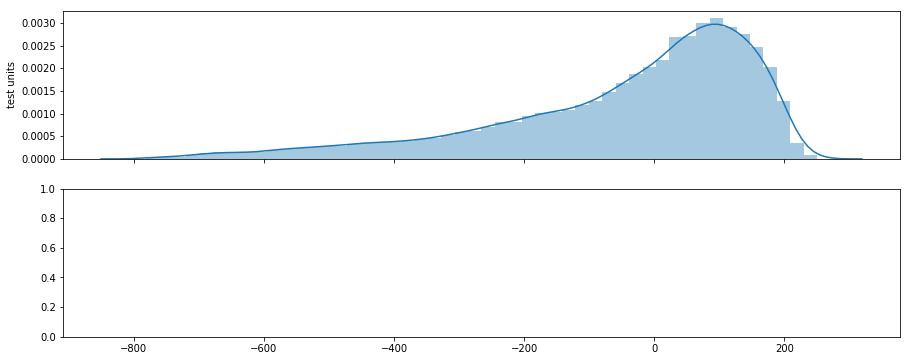

In [104]:
res = {}
res['all_full'] = res_full
fig, axes = plt.subplots(2, 1, figsize=(15, 6), sharex=True)
axes = axes.flatten()

for name, dc2 in res.items():
    sns.distplot(dc2['dy_test'], ax=axes[0])
    
lbl = axes[0].set_ylabel('test units')

In [100]:
def plot_grouped_by_RUL(df_sub, leg=True, cols_data=None):
    if cols_data is None:
        cols = [col for col in df_sub.columns if len(df_sub[col].unique()) > 2]
        cols_data = [col for col in cols if col.startswith('sen') or col.startswith('os')]

    g = sns.PairGrid(data=df_sub, x_vars="RUL", y_vars=cols_data, hue="serial_number", height=5, aspect=2, )
    g = g.map(plt.plot, alpha=0.5)
    g = g.set(xlim=(df_sub['RUL'].max(), df_sub['RUL'].min()))
    if leg:
        g = g.add_legend()

c:\users\kwesendrup\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\kwesendrup\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


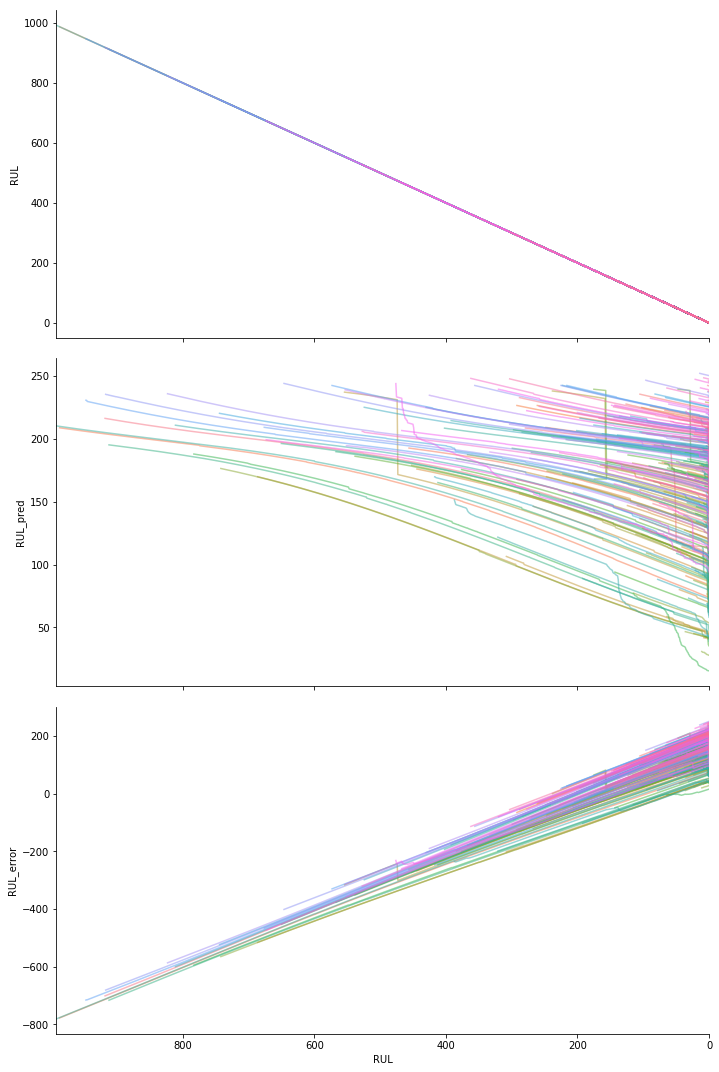

In [105]:
tmp = data[['RUL', 'serial_number']]
tmp['RUL_error'] = res['all_full']['dy_test']
tmp['RUL_pred'] = res['all_full']['y_test_p']

plot_grouped_by_RUL(tmp, leg=False, cols_data=['RUL', 'RUL_pred', 'RUL_error'])

In [95]:
# Remove zero rows until first measurement is != 0
data = pd.read_pickle("./data/rawdata/data_preprocessed.pkl")
serials = data['serial_number'].unique()
df2 = pd.DataFrame()
for ser in serials:   
    df = data.loc[data['serial_number']==ser]
    df = df[((df.Reallocated_Sector_Count != 0).cumsum() > 0) |
  ((df.Reported_Uncorrectable_Errors != 0).cumsum() > 0) |
  ((df.Command_Timeout != 0).cumsum() > 0) |
  ((df.Current_Pending_Sector_Count != 0).cumsum() > 0) |
  ((df.Offline_Uncorrectable != 0).cumsum() > 0)]
    df2 = df2.append(df)


testing units mse: 3380.309960453057


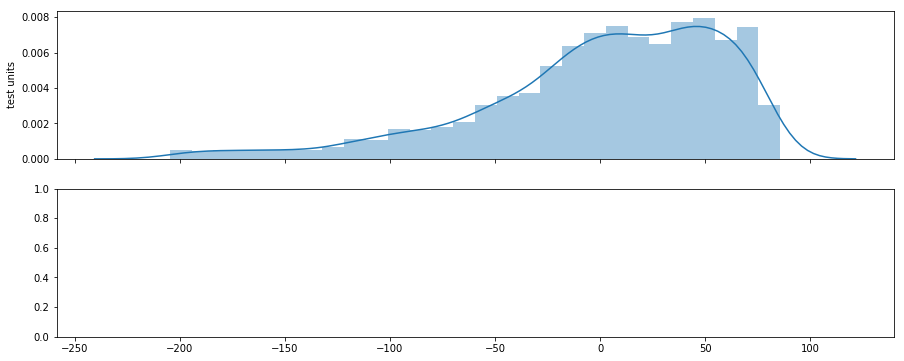

In [106]:
data = pd.read_pickle("./data/rawdata/data_test.pkl")
X_test = data[cols_data].values
y_test = data['RUL'].values
model = joblib.load("./data/rawdata/model.pkl")
y_test_p = model.predict(X_test)
scoring = sk.metrics.mean_squared_error
print("testing units mse: %s" % scoring(y_test_p, y_test))
res_full = {
        'dy_test': y_test_p - y_test,
        'y_test_p': y_test_p,
    }
def plot_grouped_by_RUL(df_sub, leg=True, cols_data=None):
    if cols_data is None:
        cols = [col for col in df_sub.columns if len(df_sub[col].unique()) > 2]
        cols_data = [col for col in cols if col.startswith('sen') or col.startswith('os')]

    g = sns.PairGrid(data=df_sub, x_vars="RUL", y_vars=cols_data, hue="serial_number", height=5, aspect=2, )
    g = g.map(plt.plot, alpha=0.5)
    g = g.set(xlim=(df_sub['RUL'].max(), df_sub['RUL'].min()))
    if leg:
        g = g.add_legend()
res = {}
res['all_full'] = res_full
fig, axes = plt.subplots(2, 1, figsize=(15, 6), sharex=True)
axes = axes.flatten()

for name, dc2 in res.items():
    sns.distplot(dc2['dy_test'], ax=axes[0])
    
lbl = axes[0].set_ylabel('test units')        

c:\users\kwesendrup\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\kwesendrup\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


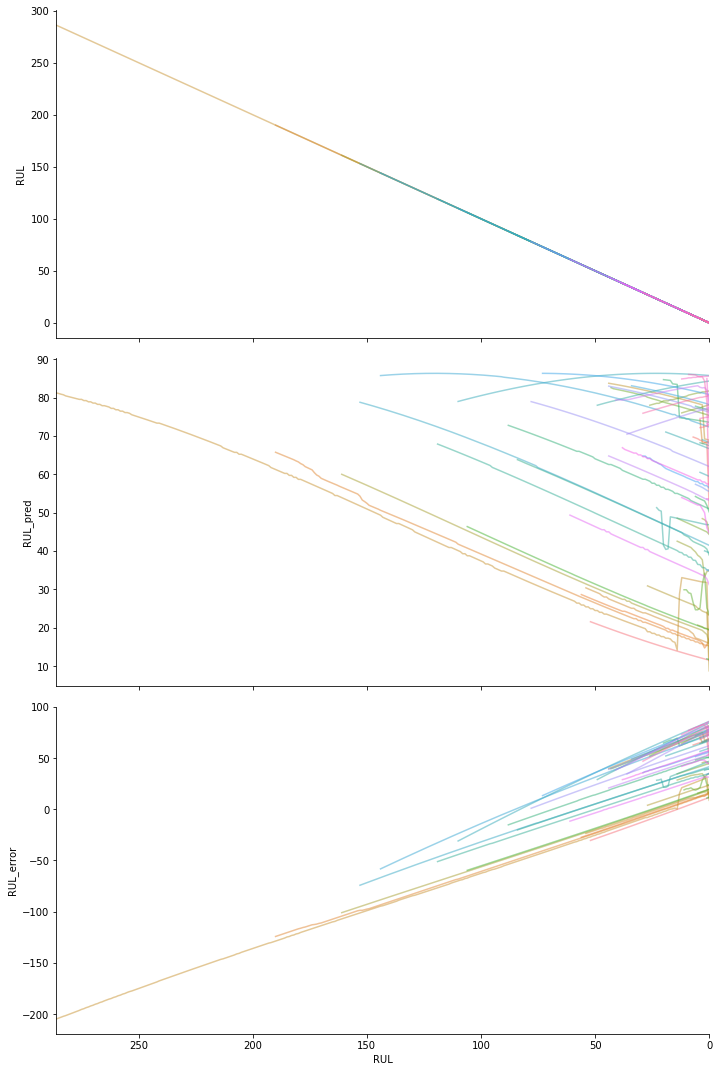

In [107]:
tmp = data[['RUL', 'serial_number']]
tmp['RUL_error'] = res['all_full']['dy_test']
tmp['RUL_pred'] = res['all_full']['y_test_p']

plot_grouped_by_RUL(tmp, leg=False, cols_data=['RUL', 'RUL_pred', 'RUL_error'])